In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train_0OECtn8.csv')
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [3]:
train.shape

(89197, 10)

In [4]:
train.duplicated().sum()

0

In [5]:
train.isnull().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [7]:
test = pd.read_csv('test_1zqHu22.csv')
test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [8]:
test.shape

(11121, 9)

In [9]:
test.isnull().sum()

row_id         0
user_id        0
category_id    0
video_id       0
age            0
gender         0
profession     0
followers      0
views          0
dtype: int64

In [10]:
train['row_id'].nunique()

89197

In [11]:
train['user_id'].nunique()

27734

In [12]:
test['user_id'].nunique()

10384

In [13]:
train['gender'].value_counts()

Male      52397
Female    36800
Name: gender, dtype: int64

In [14]:
test['gender'].value_counts()

Male      6377
Female    4744
Name: gender, dtype: int64

In [15]:
train['profession'].value_counts()

Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64

In [16]:
test['profession'].value_counts()

Student                 5572
Other                   3366
Working Professional    2183
Name: profession, dtype: int64

In [17]:
train['category_id'].nunique()

47

In [18]:
test['category_id'].nunique()

23

In [19]:
train['video_id'].nunique()

175

In [20]:
test['video_id'].nunique()

128

In [21]:
combined = pd.concat([train, test], axis = 0)
combined.shape

(100318, 10)

In [22]:
combined = combined.drop('row_id', axis = 1)
combined.shape

(100318, 9)

In [23]:
newtrain = combined.iloc[0:89197, :]
newtest = combined.iloc[89197: , :]

In [24]:
newtrain.shape

(89197, 9)

In [25]:
newtest = newtest.drop('engagement_score', axis = 1)

In [26]:
newtest.shape

(11121, 8)

In [27]:
newtrain.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,Male,Student,180,1000,4.33
1,5304,32,132,14,Female,Student,330,714,1.79
2,1840,12,24,19,Male,Student,180,138,4.35
3,12597,23,112,19,Male,Student,220,613,3.77
4,13626,23,112,27,Male,Working Professional,220,613,3.13


In [28]:
common_video_views = pd.merge(newtrain, newtest, on = ('video_id', 'user_id', 'category_id'))
common_video_views.head()

,user_id,category_id,video_id,age_x,gender_x,profession_x,followers_x,views_x,engagement_score,age_y,gender_y,profession_y,followers_y,views_y


{'whiskers': [<matplotlib.lines.Line2D at 0x1d443a68eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d443a735b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d443a68b50>],
 'medians': [<matplotlib.lines.Line2D at 0x1d443a73c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d443a73fd0>],
 'means': []}

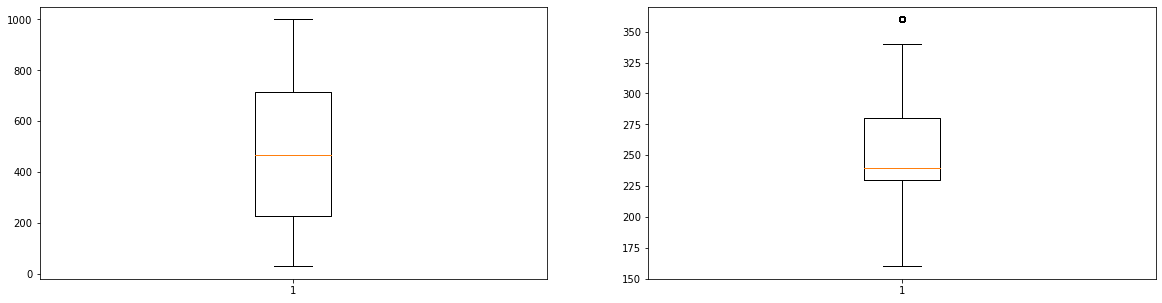

In [29]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(newtrain['views'])
ax2.boxplot(newtrain['followers'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d4443c7970>,
 'caps': [<matplotlib.lines.Line2D at 0x1d4443d1070>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d4443c7610>],
 'medians': [<matplotlib.lines.Line2D at 0x1d4443d1730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d4443d1a90>],
 'means': []}

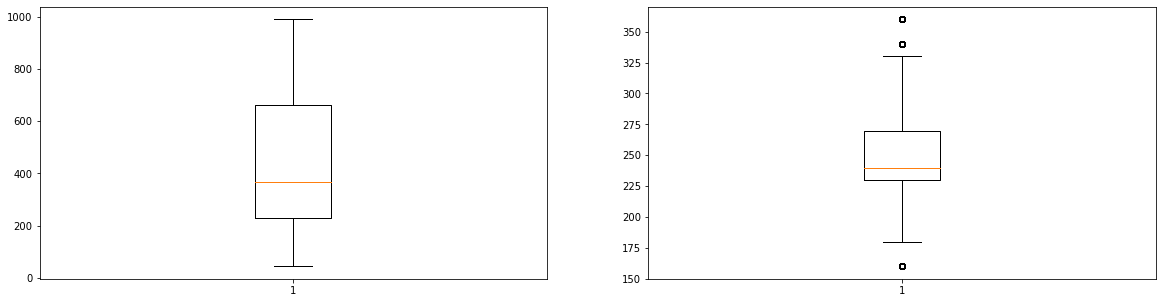

In [30]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(newtest['views'])
ax2.boxplot(newtest['followers'])

In [31]:
Q1 = newtrain.quantile(0.25)
Q3 = newtrain.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

user_id             13874.00
category_id            18.00
video_id               86.00
age                    14.00
followers              50.00
views                 485.00
engagement_score        1.25
dtype: float64


In [32]:
print(newtrain.quantile(0.10))
print(newtrain.quantile(0.90))

user_id             2785.60
category_id            5.00
video_id              12.00
age                   14.00
followers            180.00
views                138.00
engagement_score       2.24
Name: 0.1, dtype: float64
user_id             24959.00
category_id            35.00
video_id              144.00
age                    37.00
followers             330.00
views                 884.00
engagement_score        4.41
Name: 0.9, dtype: float64


In [33]:
newtrain = newtrain[~((newtrain < (Q1 - 1.5 * IQR)) | (newtrain > (Q3 + 1.5 * IQR))).any(axis=1)]
print(newtrain.shape)

(86370, 9)


<ipython-input-33-25a8463aa823>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  newtrain = newtrain[~((newtrain < (Q1 - 1.5 * IQR)) | (newtrain > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-33-25a8463aa823>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  newtrain = newtrain[~((newtrain < (Q1 - 1.5 * IQR)) | (newtrain > (Q3 + 1.5 * IQR))).any(axis=1)]


In [34]:
newtrain.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,Male,Student,180,1000,4.33
1,5304,32,132,14,Female,Student,330,714,1.79
2,1840,12,24,19,Male,Student,180,138,4.35
3,12597,23,112,19,Male,Student,220,613,3.77
4,13626,23,112,27,Male,Working Professional,220,613,3.13


In [35]:
newtest.head()

,user_id,category_id,video_id,age,gender,profession,followers,views
0,7986,12,42,14,Male,Student,180,138
1,11278,34,115,14,Male,Student,230,840
2,17245,8,110,44,Female,Working Professional,280,628
3,9851,16,137,18,Male,Student,270,462
4,16008,34,96,47,Female,Other,230,840


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
x = ['gender', 'profession']
for i in x:
    newtrain[i] = le.fit_transform(newtrain[i])
    newtest[i] = le.fit_transform(newtest[i])

In [38]:
x = newtrain.drop('engagement_score', axis = 1)
y = newtrain['engagement_score']

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 1)

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [41]:
from sklearn.metrics import r2_score

In [42]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y_pred = lr.fit(x_train, y_train).predict(x_test)
print(r2_score(y_test, y_pred))

0.24278027903849864


In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
y_pred = rf.fit(x_train, y_train).predict(x_test)
print(r2_score(y_test, y_pred))

0.3545829274208854


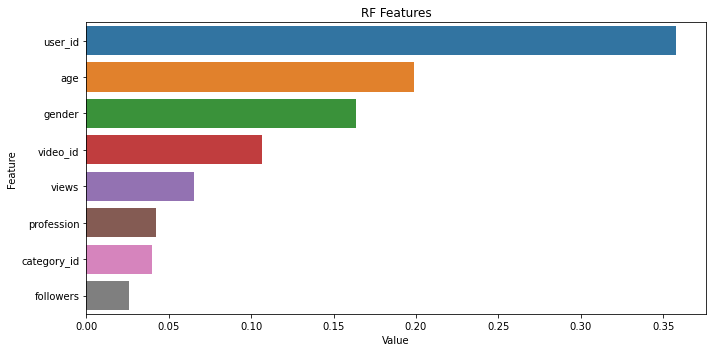

In [45]:
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RF Features')
plt.tight_layout()
plt.show()


In [49]:
x_train = newtrain.drop('engagement_score', axis = 1)
y_train = newtrain['engagement_score']
x_test = newtest

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
y_pred = rf.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'row_id' : test.row_id, 'engagement_score' : y_pred})
solution.to_csv('Solution.csv', index = False)